### Practical Implementation of Support Vector Classifier

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# Create systhetic datasets
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=2, n_clusters_per_class=2, n_redundant=0)

In [9]:
# X
# y

In [11]:
pd.DataFrame(X)[0].head()

0   -0.429340
1   -0.592466
2    1.262338
3   -0.504123
4   -1.158625
Name: 0, dtype: float64

<Axes: xlabel='0', ylabel='1'>

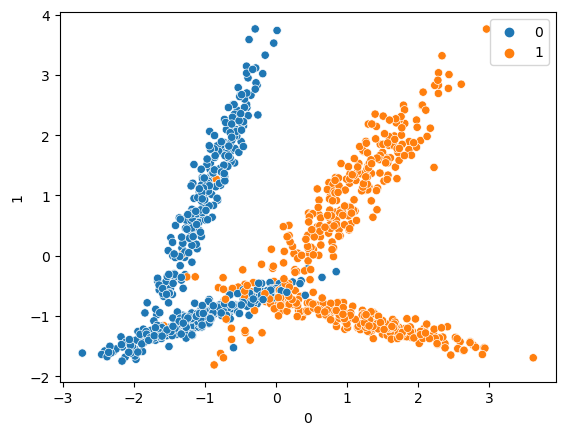

In [12]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [16]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [17]:
svc.coef_

array([[ 2.22110616, -0.32512716]])

In [18]:
# Prediction
y_pred = svc.predict(X_test)

In [19]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       118
           1       0.95      0.92      0.94       132

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[112   6]
 [ 10 122]]
0.936


### Hyper Parameter Tuning with SVC

In [23]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range
param_grid= {'C': [0.1, 1, 10, 100, 1000],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel': ['linear']
}

In [24]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, cv = 5, verbose=3)

In [26]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.947 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.947 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.927 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.947 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.947 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.940 total time=   0.0s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'linear'}

### Prediction

In [29]:
y_pred4 = grid.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       118
           1       0.95      0.92      0.94       132

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

[[112   6]
 [ 10 122]]
0.936
